# Regression Analysis

## This script contains the following points: 
### 1. Importing Libraries and Dataset
### 2. Data Cleaning
### 3. Data Prepping
### 4. Regression Analysis
### 5. Conclusion

## 1. Importing Libraries and Dataset

In [1]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Graphs display without calling
%matplotlib inline

In [3]:
# Import data
path = r'C:\Users\nguye\OneDrive\05-2023 US Mass Shooting Data Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mass_Shootings_GA.csv'))

## 2. Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'Incident ID', 'Incident Date', 'State', 'City Or County',
       'Victims Injured', 'Victims Killed', 'Total Victims',
       'Suspects Injured', 'Suspects Killed', 'Suspects Arrested',
       'Total Suspects', 'Suspect Category'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Suspect Category
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0,1,Single suspect
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0,0,No suspects
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0,0,No suspects
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0,0,No suspects
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0,0,No suspects


In [6]:
df.shape

(4232, 13)

In [7]:
# Remove 'Unnamed: 0' column
df = df.drop(columns = {'Unnamed: 0'})

In [8]:
# Check for missing values
df.isnull().sum()
# No missing values found

Incident ID          0
Incident Date        0
State                0
City Or County       0
Victims Injured      0
Victims Killed       0
Total Victims        0
Suspects Injured     0
Suspects Killed      0
Suspects Arrested    0
Total Suspects       0
Suspect Category     0
dtype: int64

In [9]:
# Check for duplicates
dups = df.duplicated()
dups.shape
# No duplicates found

(4232,)

<AxesSubplot:xlabel='Total Victims', ylabel='Count'>

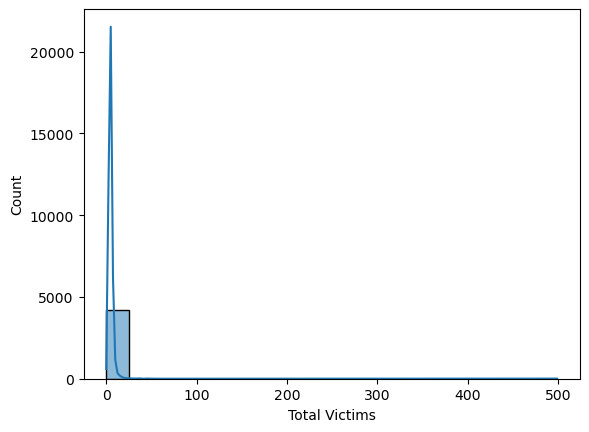

In [10]:
# Check for extreme values
sns.histplot(df['Total Victims'], bins = 20, kde = True)

In [11]:
df[df['Total Victims'] > 100] # There are two extreme values, regression analysis will be ran with and without outliers

,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Suspect Category
2965,946496,"October 1, 2017",Nevada,Las Vegas,441,58,499,0,1,0,1,Single suspect
3487,577157,"June 12, 2016",Florida,Orlando,53,49,102,0,1,0,1,Single suspect


In [12]:
# Check the mean, median, and max
print('Mean:', df['Total Victims'].mean())
print('Median:', df['Total Victims'].median())
print('Max:', df['Total Victims'].max())

Mean: 5.135633270321361
Median: 4.0
Max: 499


## 3. Data Prepping

My dataset will not show any meaningful analysis as it pertains to regression analysis. Regardless, I want to continue working on this dataset to show that I understand the steps required to conduct a regression analysis. For this task, I am utilizing the "Victims Injured" and "Total Victims" variables. These two variables do indeed have a relationship between each other, as evident by the fact that "Total Victims" is the sum of "Victims Injured" and "Vctims Killed". 

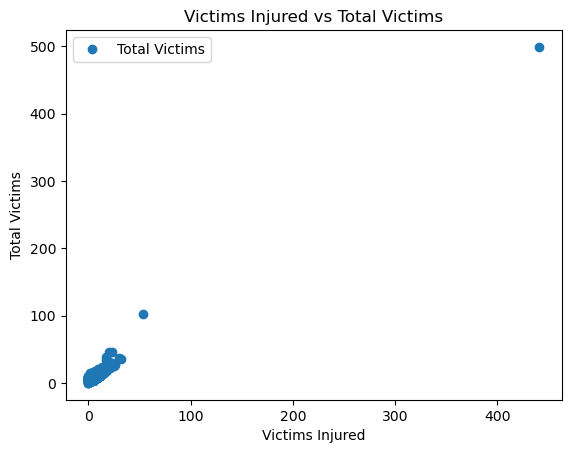

In [13]:
# Create a scatterplot for 'Injured Victims' and 'Total Victims' variables
df.plot(x = 'Victims Injured', y = 'Total Victims', style = 'o')
plt.title('Victims Injured vs Total Victims')
plt.xlabel('Victims Injured')
plt.ylabel('Total Victims')
plt.show()

### Hypothesis: "As the number of victims injured increases, so does the total victims."

In [14]:
# Reshape the varaibles into NumPy arrays and place in separate objects
X = df['Victims Injured'].values.reshape(-1, 1)
y = df['Total Victims'].values.reshape(-1, 1)

In [15]:
X

array([[3],
       [2],
       [4],
       ...,
       [3],
       [3],
       [2]], dtype=int64)

In [16]:
y

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [4]], dtype=int64)

In [17]:
# Splilt data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4. Regression Analysis

In [18]:
# Create regression object to fit onto training set
regression = LinearRegression()

In [19]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

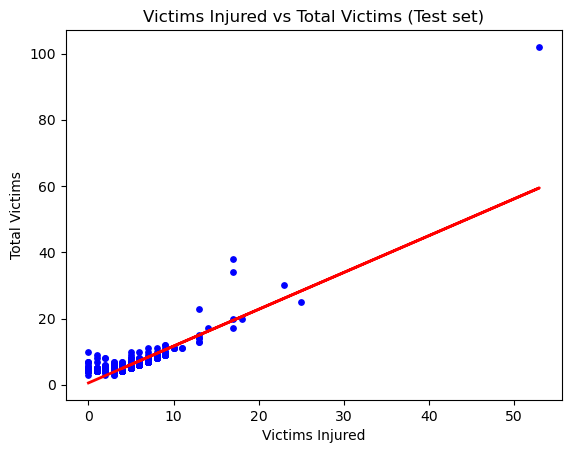

In [21]:
# Create plot that shows regression line from the model of test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 2)
plot_test.title('Victims Injured vs Total Victims (Test set)')
plot_test.xlabel('Victims Injured')
plot_test.ylabel('Total Victims')
plot_test.show()

### Interpretation of regression line

The line shows a positive slope, meaning that as the numbers of victims injured increases, so does the total victims. Majority of the data points are close to the regression line, which support the hypothesis

In [22]:
# Show the model's summary statistics
print('Slope:', regression.coef_)
print('Mean Squared Error:', mean_squared_error(y_test, y_predicted))
print('R2 score:', r2_score(y_test, y_predicted))

Slope: [[1.11099957]]
Mean Squared Error: 3.7958483366055265
R2 score: 0.7004758140596685


In [23]:
# Create a dataframe comparing the actual and predicted values
data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_compare.head(20)

,Actual,Predicted
0,4,0.550431
1,4,3.883429
2,4,4.994429
3,4,3.883429
4,5,3.883429
5,8,2.772430
6,5,6.105428
7,12,10.549427
8,4,4.994429
9,4,3.883429


### Model's Performance

The model's slope (1.11) indicate a positive relationship, which indicates that as the number of victims injured increases, so too does the total victims. 

The model's root mean squared error (MSE) is small (3.80), which indicates that the regression line passes fairly close to the oservations, making it a good fit. 

The model's r-squared value shows a 0.70 variance of the data, which means that the model is a 70% fit. 

Looking at the values side by side, show that there is a difference in the actual and predicted values. Therefore the model does not provide a good prediction of the values.

## Regression Analysis without Extreme Values

In [24]:
# Clean extreme values from 'Total Victims'
df_2 = df[df['Total Victims'] < 100]

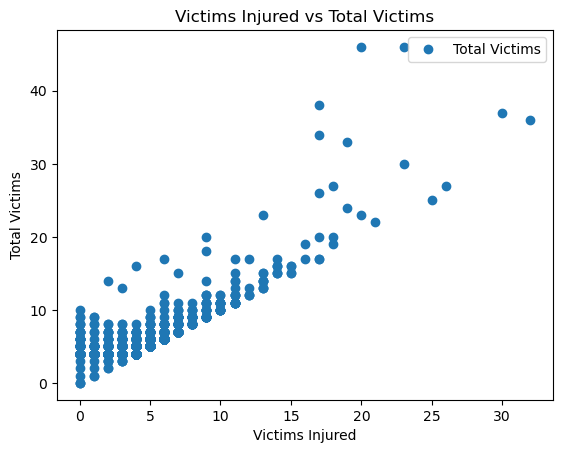

In [25]:
# Scatter plot without outliers
df_2.plot(x = 'Victims Injured', y = 'Total Victims', style = 'o')
plt.title('Victims Injured vs Total Victims')
plt.xlabel('Victims Injured')
plt.ylabel('Total Victims')
plt.show()

In [26]:
# Reshape variables
X_2 = df_2['Victims Injured'].values.reshape(-1, 1)
y_2 = df_2['Total Victims'].values.reshape(-1, 1)

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [28]:
# Run and fit the regression
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [29]:
# Predicting values
y_predicted_2 = regression.predict(X_test_2)

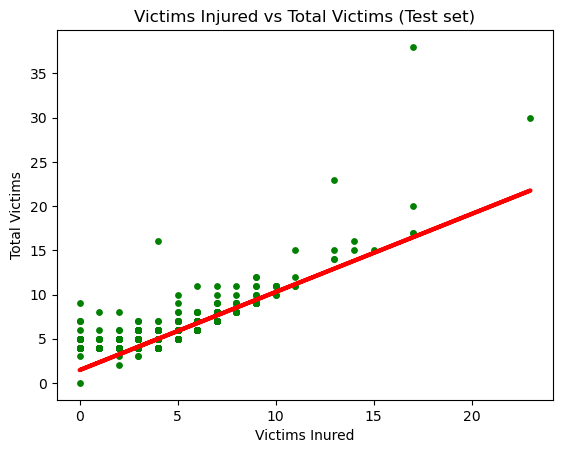

In [30]:
# Visualizing test set results
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color = 'green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color = 'red', linewidth = 3)
plot_test.title('Victims Injured vs Total Victims (Test set)')
plot_test.xlabel('Victims Inured')
plot_test.ylabel('Total Victims')
plot_test.show()

In [31]:
# Show the model's summary statistics
print('Slope:', regression.coef_)
print('Mean Squared Error:', mean_squared_error(y_test_2, y_predicted_2))
print('R2 score:', r2_score(y_test_2, y_predicted_2))

Slope: [[0.88326824]]
Mean Squared Error: 1.8933531486506865
R2 score: 0.5855051185029662


In [32]:
# Create a dataframe comparing the actual and predicted values
data_compare_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_compare.head(20)

,Actual,Predicted
0,4,0.550431
1,4,3.883429
2,4,4.994429
3,4,3.883429
4,5,3.883429
5,8,2.772430
6,5,6.105428
7,12,10.549427
8,4,4.994429
9,4,3.883429


### Model's Performance

The model's slope (0.88) indicate a positive relationship, which indicates that as the number of victims injured increases, so too does the total victims. 

The model's root mean squared error (MSE) is small (1.89), which indicates that the regression line passes fairly close to the oservations, making it a good fit. 

The model's r-squared value shows a 0.59 variance of the data, which means that the model is a 59% fit. 

Looking at the values side by side, show that there is a difference in the actual and predicted values. Therefore the model does not provide a good prediction of the values.

## 5. Conclusion

The model's visualization and summary statistics show that it is a good model at predicting the values, but looking at the predicted and actual values show that it isn't. This is to be expected, as the dataset that I'm working with is not a good dataset to be used for regression analysis. Mainly in part because I am utilizing variables that are in close relationship with each other. Therefore my dataset has selection bias. 